In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras

assert tf.__version__ == '1.12.0'
assert keras.__version__ == '2.1.6-tf'

if tf.test.is_gpu_available():
    device_name = tf.test.gpu_device_name()
    if device_name != '/device:GPU:0':
        raise SystemError('GPU device not found')
    print('Used GPU at: {}'.format(device_name))

In [2]:
import tensorflow.keras.preprocessing.image as image
import tensorflow.keras.models as models

import tensorflow.keras.applications.densenet as densenet
import tensorflow.keras.applications.inception_v3 as inception_v3

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Evaluate Functions

In [4]:
from __future__ import division
def decode_prediction(Pred, Top=1):
    res = []
    for pred in Pred:
        scores = [(pred[i], i) for i in range(120)]
        scores.sort(reverse=1)
        res.append(scores[:Top])
    return res

def calculate_accuracy(Pred, Lbl, Top):
    idx, cnt = 0, 0
    for res in decode_prediction(Pred, Top):
        lbls = [res[i][1] for i in range(Top)]
        if Lbl[idx] in lbls:
            cnt += 1
        idx += 1
    return cnt / len(Pred)

## Prepare the testing data

In [5]:
from scipy.io import loadmat
from os.path import join

prefix = './Stanford_Dog_Breed'
imgfix = 'Test'

In [6]:
ImgGen_Inception = image.ImageDataGenerator(preprocessing_function=inception_v3.preprocess_input)
ImgGen_DenseNet  = image.ImageDataGenerator(preprocessing_function=densenet.preprocess_input)

## InceptionV3 Evaluation

In [7]:
model_inceptionV3 = models.load_model('./models/inceptionv3_catdfc120_258_8064')

In [8]:
# Generate Random Subsets 
Test_Inception  = ImgGen_Inception.flow_from_directory(
                        join(prefix, imgfix), 
                        target_size=(224, 224), 
                        class_mode='sparse', 
                        batch_size=32, 
                        shuffle=True)

Found 8580 images belonging to 120 classes.


In [9]:
# pick up the first batch from the generator
pred = model_inceptionV3.predict_on_batch(Test_Inception[0][0])
lbls = Test_Inception[0][1]

print(calculate_accuracy(pred, lbls, Top=1))

0.78125


In [10]:
image_index=Test_Inception.index_array[0:32]
def cutstring_pre(str):
    str_index=str.index( '-')
    string_extracted=str[str_index+1:]
    return string_extracted

def cutstring_class(str):
    str_index=str.index( '-')
    string_extracted=str[str_index+1:]
    str_index=string_extracted.index( '/')
    string_extracted=string_extracted[:str_index]
    return string_extracted        

n02111277-Newfoundland/n02111277_6891.jpg
n02099267-flat-coated_retriever/n02099267_3431.jpg
n02111277-Newfoundland/n02111277_6577.jpg
n02094258-Norwich_terrier/n02094258_81.jpg
n02102973-Irish_water_spaniel/n02102973_3998.jpg
n02102973-Irish_water_spaniel/n02102973_4459.jpg
n02107908-Appenzeller/n02107908_7205.jpg


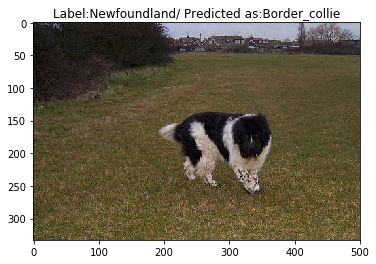

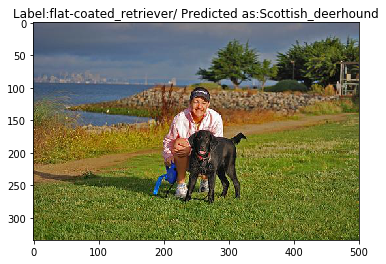

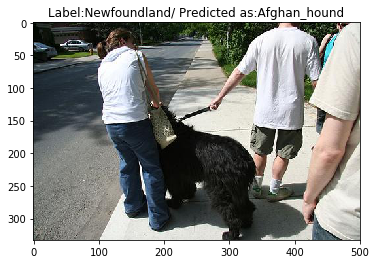

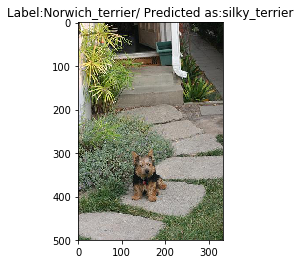

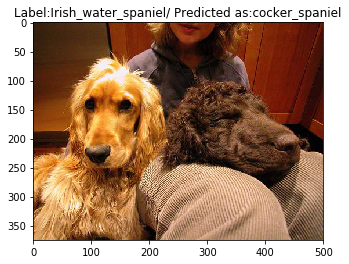

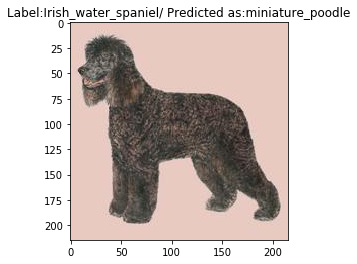

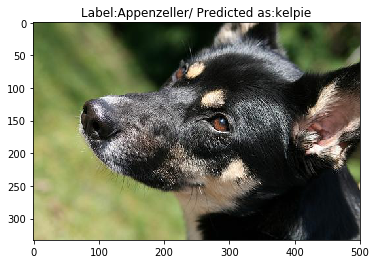

In [11]:
## Display the Misclassified Samples 
Y= decode_prediction(pred)
for i in range(32):
    if Y[i][0][1]!=lbls[i]:
        plt.figure(figsize=(8,4))
        image_index=Test_Inception.index_array[i]
        image_name=Test_Inception.filenames[image_index]
        for (key, value) in Test_Inception.class_indices.items():
            if value == Y[i][0][1]:
                temp=key
        print(image_name)
        image= mpimg.imread(join(prefix, imgfix,image_name))
        plt.imshow(image)
        title='Label:'+cutstring_class(image_name)+'/ Predicted as:'+cutstring_pre(temp)
        plt.title(title)
    

## DenseNet121 Evaluation

In [12]:
model_densenet121 = models.load_model('./models/densenet121_dfc120_finetune_9_8141')

In [13]:
# Generate Random Subsets 
Test_DenseNet = ImgGen_DenseNet.flow_from_directory(
                        join(prefix, imgfix), 
                        target_size=(224, 224), 
                        class_mode='sparse', 
                        batch_size=32, 
                        shuffle=True)

Found 8580 images belonging to 120 classes.


In [14]:
# pick up the first batch from the generator
pred = model_densenet121.predict_on_batch(Test_DenseNet[0][0])
lbls = Test_DenseNet[0][1]

print(calculate_accuracy(pred, lbls, Top=1))

0.71875


n02088094-Afghan_hound/n02088094_5355.jpg
n02095889-Sealyham_terrier/n02095889_4030.jpg
n02110806-basenji/n02110806_3702.jpg
n02099712-Labrador_retriever/n02099712_4705.jpg
n02107683-Bernese_mountain_dog/n02107683_71.jpg
n02093647-Bedlington_terrier/n02093647_2747.jpg
n02111277-Newfoundland/n02111277_6891.jpg
n02111277-Newfoundland/n02111277_6577.jpg
n02112018-Pomeranian/n02112018_2271.jpg


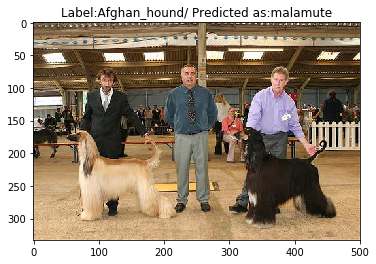

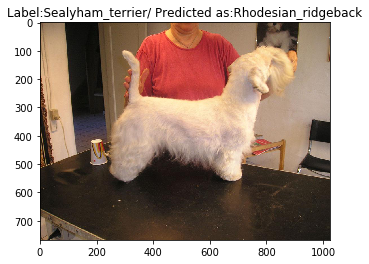

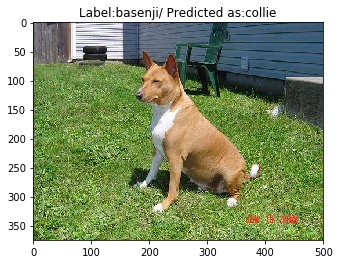

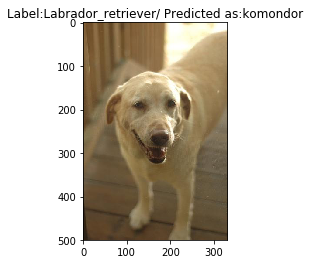

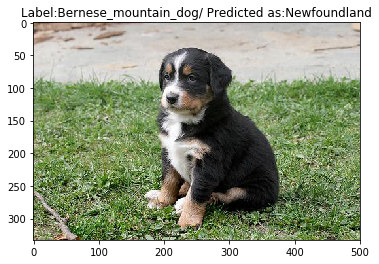

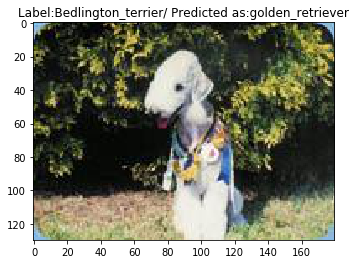

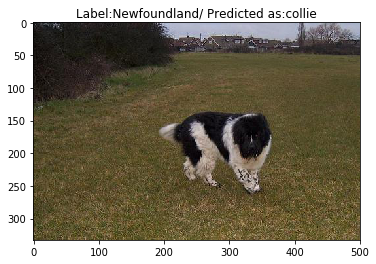

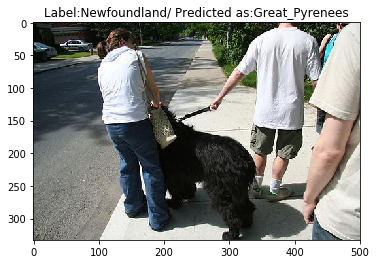

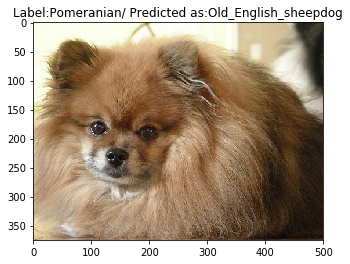

In [15]:
## Display the Misclassified Samples
Y= decode_prediction(pred)
for i in range(32):
    if Y[i][0][1]!=lbls[i]:
        plt.figure(figsize=(8,4))
        image_index=Test_Inception.index_array[i]
        image_name=Test_Inception.filenames[image_index]
        for (key, value) in Test_Inception.class_indices.items():
            if value == Y[i][0][1]:
                temp=key
        print(image_name)
        image = mpimg.imread(join(prefix, imgfix,image_name))
        plt.imshow(image)
        title='Label:'+cutstring_class(image_name)+'/ Predicted as:'+cutstring_pre(temp)
        plt.title(title)

## VGG Evaluation

Since the model of VGG19 is too large, approx. 1GB, which exceed the limits of github. 

Therefore we will skip evaluate the VGG model.

In [16]:
# model_vgg = models.load_model('vgg19_dfc120_40_6751')
# res_vgg = model_vgg.evaluate_generator(Test, verbose=0, steps=None, workers=4, use_multiprocessing=True, max_queue_size=12)

# print('Losses of the fine tuned VGG model',res_vgg[0])
# print('Accuracy of the fine tuned VGG model',res_vgg[1])
